In [1]:
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
source = 'normal'
if source == 'post':
    results_dir = Path('../output/benchmarking/post_pro_result')

else:
    results_dir = Path('../output/benchmarking/results')

In [3]:
balanced_accuracy_df = pd.DataFrame()
roc_auc_df = pd.DataFrame()
f1_score_df = pd.DataFrame()
precision_df = pd.DataFrame()
recall_df = pd.DataFrame()
accuracy_df = pd.DataFrame()
average_precision_df = pd.DataFrame()

In [4]:
files = sorted(results_dir.glob('*.csv'), key=lambda x: x.stem)
for file in files:
#for file in results_dir.glob('*.csv'):
    model_name = file.stem  # Nom du modèle basé sur le nom du fichier
    df = pd.read_csv(file)

    # Ajout des informations dans les DataFrames correspondants
    balanced_accuracy_df[model_name] = df['balanced_accuracy']
    roc_auc_df[model_name] = df['roc_auc']
    f1_score_df[model_name] = df['f1_score']
    precision_df[model_name] = df['precision']
    recall_df[model_name] = df['recall']
    accuracy_df[model_name] = df['accuracy']
    average_precision_df[model_name] = df['average_precision']

In [5]:
balanced_accuracy_df = balanced_accuracy_df.T
roc_auc_df = roc_auc_df.T
f1_score_df = f1_score_df.T
precision_df = precision_df.T
recall_df = recall_df.T
accuracy_df = accuracy_df.T
average_precision_df = average_precision_df.T

In [6]:
video_ids = df['video_id']
balanced_accuracy_df.columns = video_ids
roc_auc_df.columns = video_ids
f1_score_df.columns = video_ids
precision_df.columns = video_ids
recall_df.columns = video_ids
accuracy_df.columns = video_ids
average_precision_df.columns = video_ids

In [7]:
balanced_accuracy_df.sort_values(by='average', ascending=False)

video_id,id_x1,id_x2,id_x3,id_x4,id_x5,average
nnunet,59.35,54.22,47.41,43.52,76.42,56.184
v20_rnn_nnunet,50.71,37.73,35.46,59.96,74.00,51.572
v21_fc_nnunet,48.33,34.41,34.57,55.71,64.47,47.498
vresnet,47.76,37.25,36.38,37.75,73.93,46.614
v25_fc_resnet,41.50,37.40,35.55,41.73,73.03,45.842
v24_resnet_rnn,39.58,35.07,35.12,35.48,71.61,43.372


In [8]:
roc_auc_df.sort_values(by='average', ascending=False)

video_id,id_x1,id_x2,id_x3,id_x4,id_x5,average
nnunet,0.988315,0.912496,0.935805,0.907891,0.977089,0.944319
v20_rnn_nnunet,0.841969,0.868401,0.924523,0.921753,0.977980,0.906925
v21_fc_nnunet,0.803118,0.850109,0.920898,0.929542,0.963626,0.893459
vresnet,0.758222,0.877650,0.927532,0.846416,0.965724,0.875109
v25_fc_resnet,0.724309,0.870018,0.922184,0.882108,0.963508,0.872425
v24_resnet_rnn,0.693380,0.840373,0.922802,0.833509,0.964179,0.850848


In [9]:
f1_score_df.sort_values(by='average', ascending=False)

video_id,id_x1,id_x2,id_x3,id_x4,id_x5,average
v20_rnn_nnunet,67.05,56.12,54.66,75.16,84.61,67.520
v21_fc_nnunet,64.85,52.62,53.88,71.82,78.04,64.242
nnunet,57.27,66.07,60.11,49.30,82.73,63.096
v25_fc_resnet,57.92,55.81,55.15,59.53,83.64,62.410
vresnet,56.81,54.17,56.84,51.53,82.04,60.278
v24_resnet_rnn,54.83,53.11,54.97,53.04,82.30,59.650


In [10]:
precision_df.sort_values(by='average', ascending=False)

video_id,id_x1,id_x2,id_x3,id_x4,id_x5,average
nnunet,94.26,87.87,95.36,92.28,96.64,93.282
vresnet,57.92,56.48,48.75,61.52,90.98,63.130
v20_rnn_nnunet,51.15,44.63,40.87,64.70,78.68,56.006
v21_fc_nnunet,48.79,42.53,40.37,58.71,69.76,52.032
v25_fc_resnet,41.95,45.28,42.35,46.13,80.05,51.152
v24_resnet_rnn,40.38,47.04,42.95,41.52,80.95,50.568


In [11]:
recall_df.sort_values(by='average', ascending=False)

video_id,id_x1,id_x2,id_x3,id_x4,id_x5,average
v20_rnn_nnunet,97.29,75.58,82.52,89.66,91.50,87.310
v21_fc_nnunet,96.66,68.98,80.97,92.47,88.54,85.524
v25_fc_resnet,93.53,72.73,79.03,83.88,87.57,83.348
v24_resnet_rnn,85.39,60.96,76.31,73.40,83.71,75.954
vresnet,55.74,52.05,68.16,44.33,74.69,58.994
nnunet,41.13,52.94,43.88,33.64,72.31,48.780


In [12]:
accuracy_df.sort_values(by='average', ascending=False)

video_id,id_x1,id_x2,id_x3,id_x4,id_x5,average
nnunet,78.54,91.10,94.23,86.99,92.87,88.746
vresnet,70.36,85.59,89.74,84.31,92.27,84.454
v20_rnn_nnunet,66.57,80.65,86.43,88.85,92.14,82.928
v21_fc_nnunet,63.36,79.66,86.26,86.35,88.23,80.772
v25_fc_resnet,52.48,81.15,87.26,78.54,91.91,78.268
v24_resnet_rnn,50.80,82.38,87.61,75.55,91.50,77.568


In [13]:
average_precision_df.sort_values(by='average', ascending=False)

video_id,id_x1,id_x2,id_x3,id_x4,id_x5,average
v20_rnn_nnunet,73.67,78.61,84.69,89.16,91.92,83.610
v21_fc_nnunet,71.06,75.37,83.91,88.70,88.34,81.476
v25_fc_resnet,61.97,77.76,83.60,80.59,90.41,78.866
v24_resnet_rnn,58.80,73.76,82.58,74.72,88.81,75.734
vresnet,66.98,72.10,80.14,68.96,86.20,74.876
nnunet,69.89,75.76,71.82,66.49,85.77,73.946


In [14]:
def plot_metric(df, metric_name):
    # Utilisation de heatmap pour une meilleure visualisation
    plt.figure(figsize=(15, 10))
    sns.heatmap(df, annot=True, fmt=".2f", cmap='RdYlGn', cbar=True)
    plt.title(f"{metric_name} Performance of Models on Videos")
    plt.ylabel("Models")
    plt.xlabel("Videos")
    plt.show()

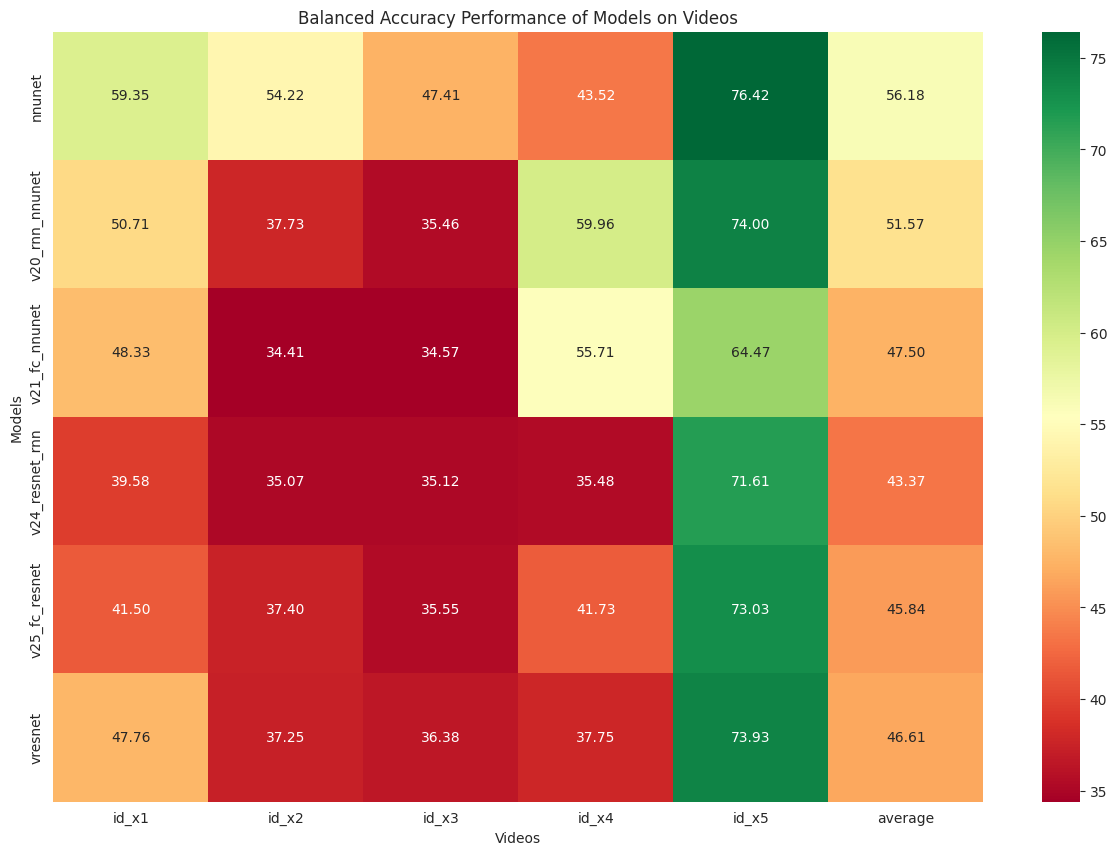

In [15]:
plot_metric(balanced_accuracy_df, "Balanced Accuracy")

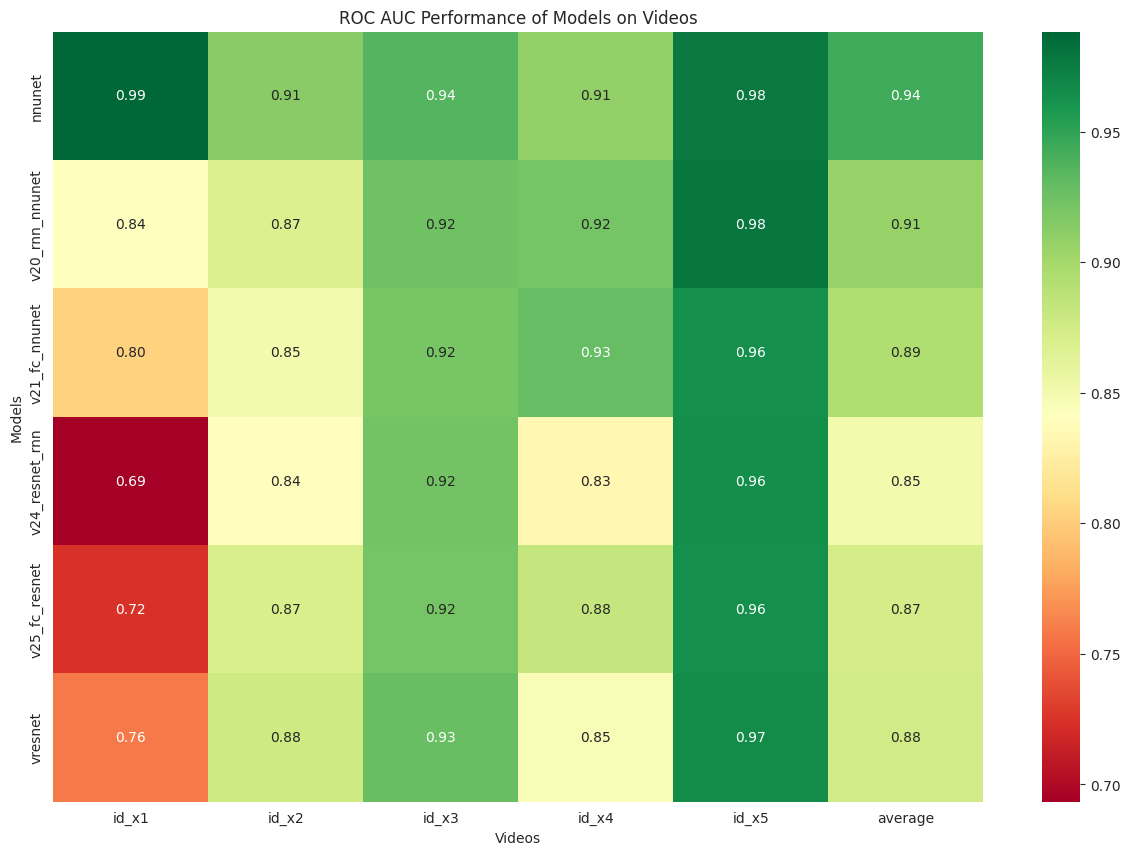

In [16]:
plot_metric(roc_auc_df, "ROC AUC")